In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from datetime import datetime
import matplotlib.ticker as ticker

In [6]:
# loading announcements
mazda=pd.read_json('dataset_mazda.json')

### Comparison of the models

Text(0, 0.5, 'Median of price')

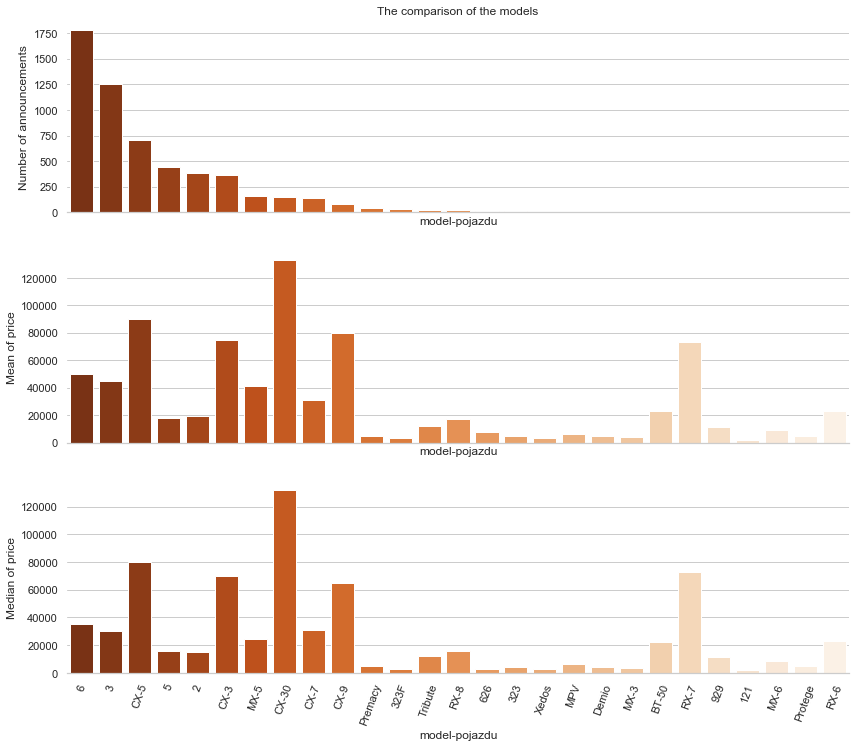

In [15]:
# order of the models on the plot
mazda_sort = mazda.groupby(['model-pojazdu'])['id'].aggregate(np.size).reset_index().sort_values('id', ascending=False)

# style and size of the plot
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12), sharex=True)
plt.xticks(rotation=70)
sns.set(style='whitegrid')
sns.despine(left=True)
# plot 1
sns.barplot(x='model-pojazdu', y='cena', data=mazda, ax = ax1,
            ci=None, estimator=np.size,  palette='Oranges_r', order = mazda_sort['model-pojazdu'])
# plot 2
sns.barplot(x='model-pojazdu', y='cena', data=mazda, ax = ax2,
            ci=None, estimator=np.mean,  palette='Oranges_r', order = mazda_sort['model-pojazdu'])
# plot 3
sns.barplot(x='model-pojazdu', y='cena', data=mazda, ax = ax3,
            ci=None, estimator=np.median,  palette='Oranges_r', order = mazda_sort['model-pojazdu'])
# description of the plot
ax1.set_title('The comparison of the models')
ax1.set_ylabel('Number of announcements')
ax2.set_ylabel('Mean of price')
ax3.set_ylabel('Median of price')

Number of announcements for each model per year of production


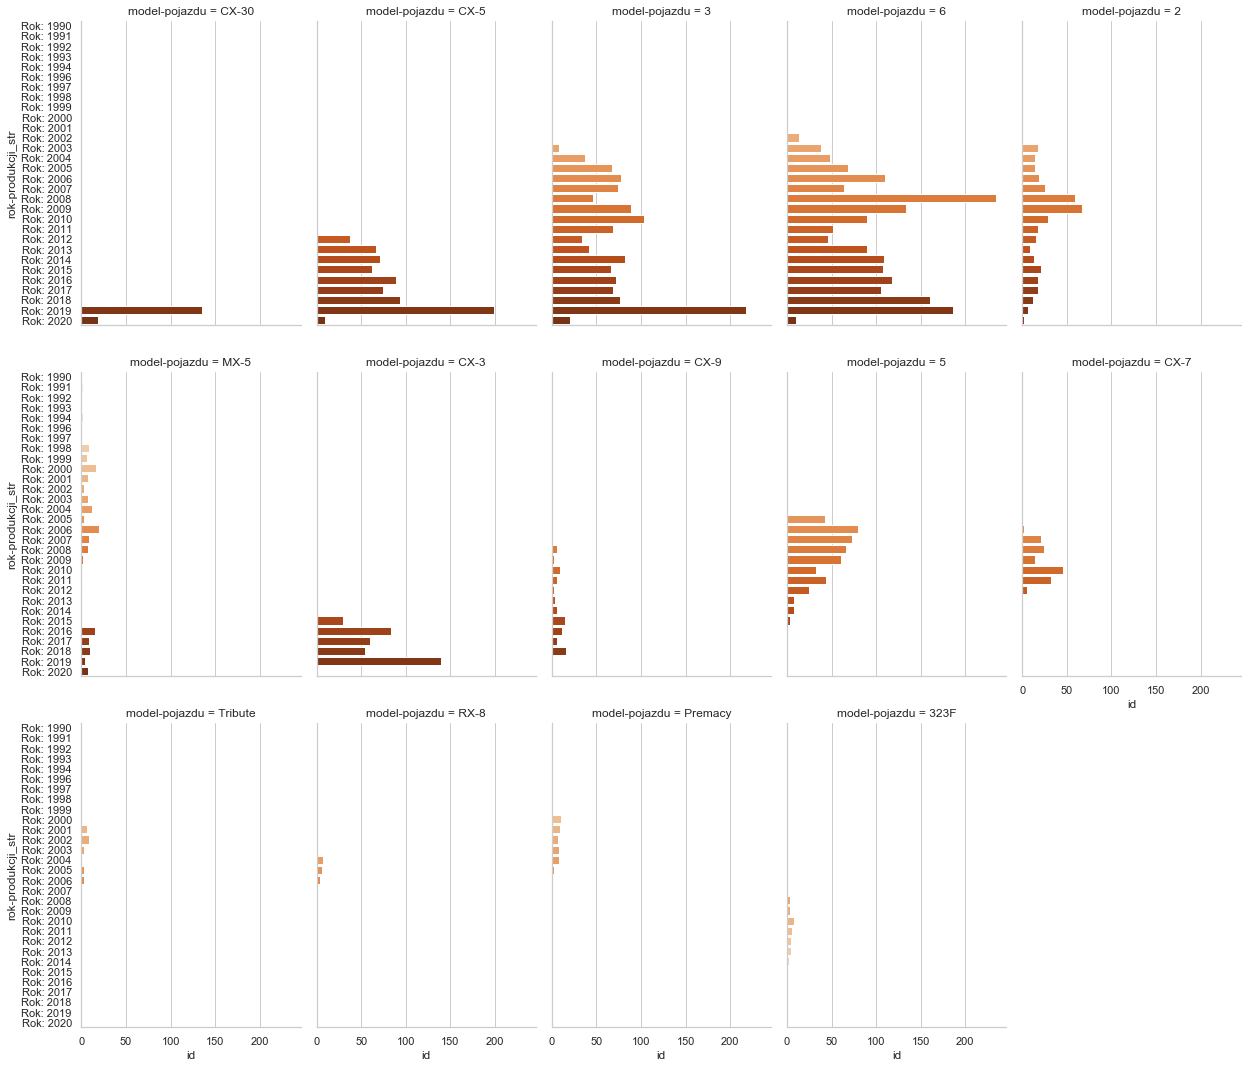

In [16]:
# change int to str
mazda['rok-produkcji_str'] = mazda['rok-produkcji'].apply(lambda x: 'Rok: ' + str(x))

# exclusion of the models with a small number of ads (<20)
mazda_filtred = mazda[mazda['model-pojazdu'].isin(
    ((mazda.groupby(['model-pojazdu'])['id'].agg(
        [np.size]).reset_index())[((mazda.groupby(['model-pojazdu'])['id'].agg(
        [np.size]).reset_index())['size']>=20)])['model-pojazdu'])].sort_values(by=['rok-produkcji'],ascending=False)


# plot
print('Number of announcements for each model per year of production')

sns.catplot(x='id', y='rok-produkcji_str', col='model-pojazdu',
                data= mazda_filtred,
                kind='bar', estimator =np.size, height=5, aspect=0.7 ,col_wrap=5,
                palette='Oranges_r')

### More detailed data on one model example

##### What is the average price of Mazda 3?

Text(0, 0.5, 'Median of price')

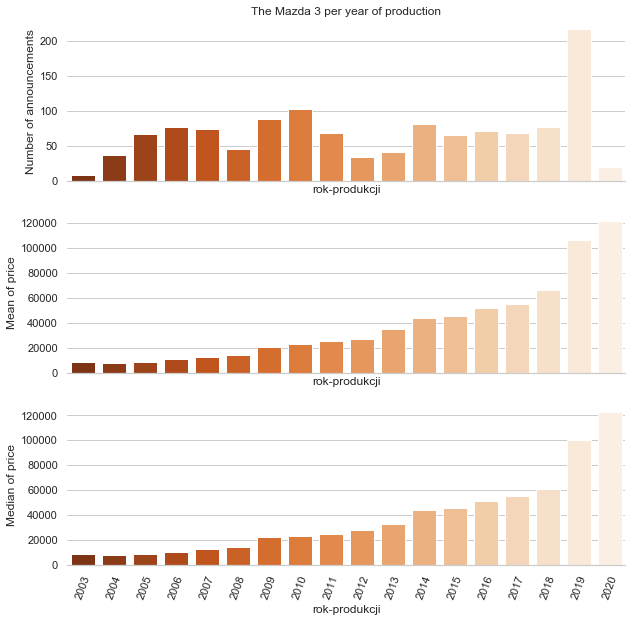

In [17]:
# choose mazda 3
mazda_3 = mazda[mazda['model-pojazdu'].isin(['3'])]

# style and size of the plot
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
plt.xticks(rotation=70)
sns.set(style='whitegrid')
sns.despine(left=True)
# plot 1
sns.barplot(x='rok-produkcji', y='cena', data=mazda_3, ax = ax1,
            ci=None, estimator=np.size,  palette='Oranges_r')
# plot 2
sns.barplot(x='rok-produkcji', y='cena', data=mazda_3, ax = ax2,
            ci=None, estimator=np.mean,  palette='Oranges_r')
# plot 3
sns.barplot(x='rok-produkcji', y='cena', data=mazda_3, ax = ax3,
            ci=None, estimator=np.median,  palette='Oranges_r')
# description of the plot
ax1.set_title('The Mazda 3 per year of production')
ax1.set_ylabel('Number of announcements')
ax2.set_ylabel('Mean of price')
ax3.set_ylabel('Median of price')

##### How the basic parameters affect the price?

In [18]:
# create a new column 
country = ['Polska', None]
mazda_3 = mazda_3.assign(pochodzenie = mazda_3['kraj-pochodzenia'].apply(lambda x: 'Polska' 
                                                                   if x in country else 'Sprowadzane'))

<Figure size 432x288 with 0 Axes>

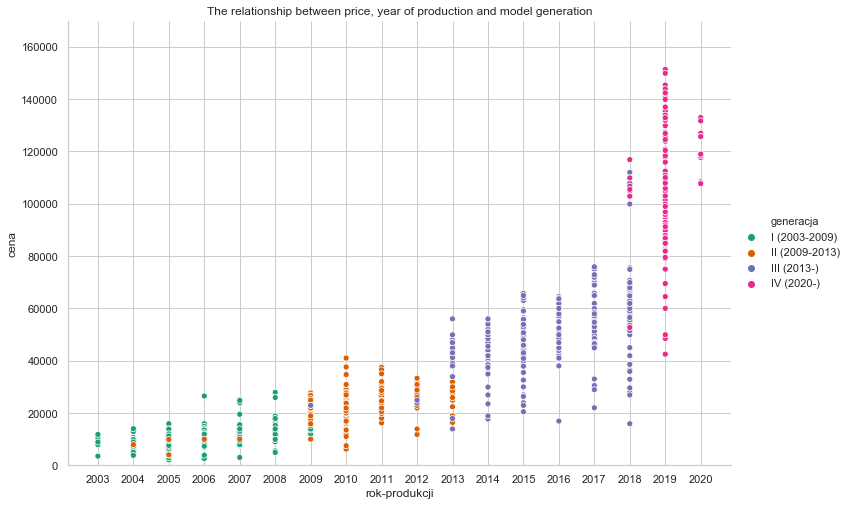

In [19]:
# style of the plot
sns.set(style='whitegrid')
sns.despine(left=True)

# plot
g = sns.relplot(data=mazda_3.sort_values(by=['generacja'],ascending=True),
    x='rok-produkcji', y='cena', hue='generacja',
    height=7, aspect=1.5,  palette='Dark2' )

# description and parameters of the plot
plt.title('The relationship between price, year of production and model generation')
plt.ylim(0, 170000)
g.ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

In [20]:
# focus on the one generation of mazda 3
mazda_3_IIIgen = mazda_3[(mazda_3['generacja'].isin(['III (2013-)'])) & 
                 (mazda_3['rok-produkcji'] >=2013)].sort_values(by=['rok-produkcji'])

<Figure size 432x288 with 0 Axes>

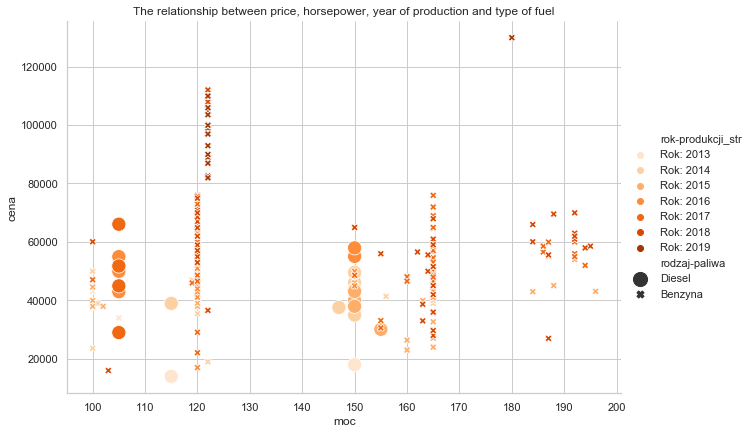

In [21]:
# style of the plot
sns.set(style='whitegrid')
sns.despine(left=True)

#plot
g = sns.relplot(data= mazda_3_IIIgen,
    x='moc', y='cena', hue = 'rok-produkcji_str', style = 'rodzaj-paliwa', size = 'rodzaj-paliwa', sizes =(50,200),
    height=6, aspect=1.5,  palette='Oranges')

# description and parameters of the plot
plt.title('The relationship between price, horsepower, year of production and type of fuel')
g.ax.xaxis.set_major_locator(ticker.MultipleLocator(10))

(0, 250000)

<Figure size 432x288 with 0 Axes>

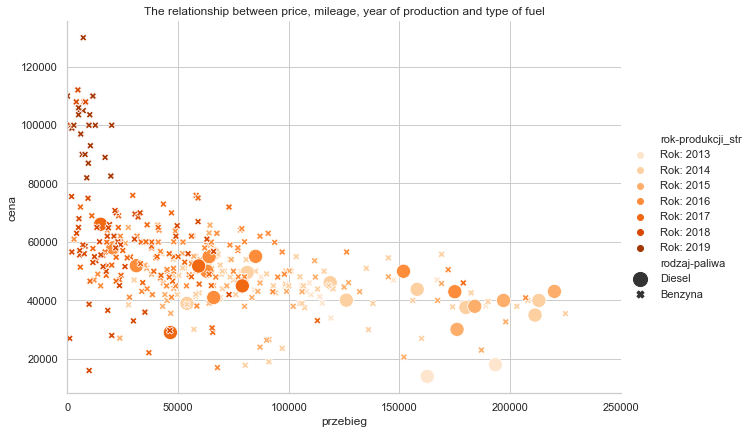

In [22]:
# style of the plot
sns.set(style='whitegrid')
sns.despine(left=True)

# plot
g = sns.relplot(data=mazda_3_IIIgen,
    x='przebieg', y='cena', hue = 'rok-produkcji_str', style = 'rodzaj-paliwa', size = 'rodzaj-paliwa', 
    sizes =(50,200),
    height=6, aspect=1.5,  palette='Oranges')

# description and parameters of the plot
plt.title('The relationship between price, mileage, year of production and type of fuel')
plt.xlim(0, 250000)

##### How the background affect the price?

The average price depends on year of production, place of production and seller


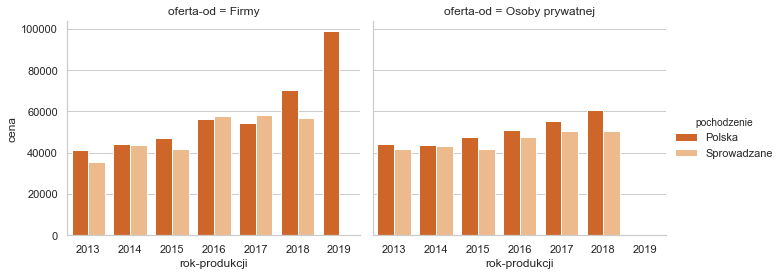

In [32]:
# plot
print('The average price depends on year of production, place of production and seller')

sns.catplot(data= mazda_3_IIIgen,
            x='rok-produkcji', y='cena', hue='pochodzenie', col='oferta-od',
            kind='bar', estimator=np.mean, height=4, aspect=1.2, ci=None, 
            palette='Oranges_r'); 

The average price depends on year of production, place of production and status "not crashed"


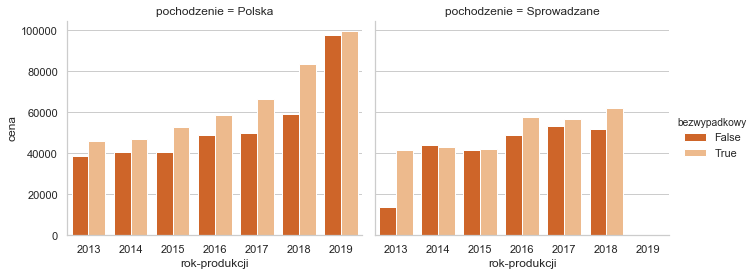

In [33]:
# plot
print('The average price depends on year of production, place of production and status "not crashed"')

sns.catplot(data= mazda_3_IIIgen,
            x='rok-produkcji', y='cena', hue='bezwypadkowy', col='pochodzenie',
            kind='bar', estimator=np.mean, height=4, aspect=1.2, ci=None, 
            palette='Oranges_r'); 

In [35]:
print('The average price depends on year of production, place of production, seller and status "not crashed"')

#table
mazda_3_IIIgen.pivot_table(values='cena', index=['pochodzenie','oferta-od','bezwypadkowy'],
                           columns='rok-produkcji',aggfunc='mean').round(2)

The average price depends on year of production, place of production, seller and status "not crashed"


rok-produkcji                                 2013      2014      2015  \
pochodzenie oferta-od       bezwypadkowy                                 
Polska      Firmy           False         32900.00  40681.20  40961.12   
                            True          46600.00  47731.82  52266.56   
            Osoby prywatnej False         42566.67  40814.21  40118.00   
                            True          45630.00  46200.00  53419.27   
Sprowadzane Firmy           False         13900.00  44714.29  41319.40   
                            True          41175.00  42526.86  42174.75   
            Osoby prywatnej False              NaN  43212.38  41637.38   
                            True          41900.00  43525.00  41900.00   

rok-produkcji                                 2016      2017      2018  \
pochodzenie oferta-od       bezwypadkowy                                 
Polska      Firmy           False         53627.00  46871.92  61070.59   
                            True          58436.36  71250.00  84518.18   
            Osoby prywatnej False         45933.28  53881.82  55809.09   
                            True          58719.17  59822.50  78933.33   
Sprowadzane Firmy           False         57566.67  58042.86  56860.00   
                            True               NaN  58898.00       NaN   
            Osoby prywatnej False         46708.25  50642.71  49725.00   
                            True          57900.00  46000.00  61900.00   

rok-produkcji                                 2019  
pochodzenie oferta-od       bezwypadkowy            
Polska      Firmy           False         97700.10  
                            True          99611.11  
            Osoby prywatnej False              NaN  
                            True               NaN  
Sprowadzane Firmy           False              NaN  
                            True               NaN  
            Osoby prywatnej False              NaN  
                            True               NaN

The average price depends on where the car come from


<Figure size 432x288 with 0 Axes>

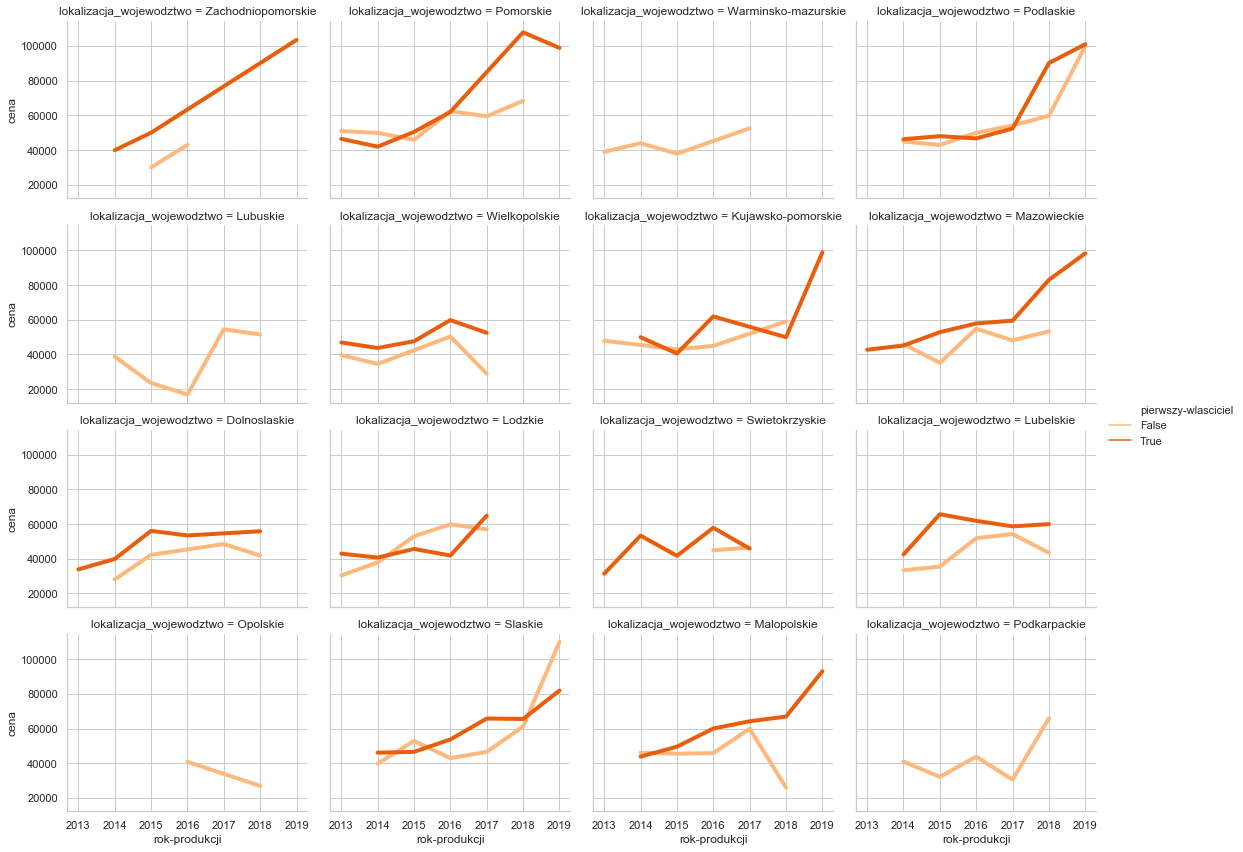

In [36]:
# order of states
regions = ['Zachodniopomorskie','Pomorskie', 'Warminsko-mazurskie', 'Podlaskie',
           'Lubuskie', 'Wielkopolskie', 'Kujawsko-pomorskie', 'Mazowieckie',
           'Dolnoslaskie',  'Lodzkie', 'Swietokrzyskie', 'Lubelskie',
           'Opolskie', 'Slaskie', 'Malopolskie', 'Podkarpackie'] # , 'Inne'

# style of the plot
sns.set(style='whitegrid')
sns.despine(left=True)

print('The average price depends on where the car come from')

# plot
sns.relplot(
    data=mazda_3_IIIgen[mazda_3_IIIgen['lokalizacja_wojewodztwo'] != 'inne'],
    x='rok-produkcji', y='cena', col='lokalizacja_wojewodztwo', hue='pierwszy-wlasciciel', # 'serwisowany-w-aso'
    kind='line', linewidth=4, col_wrap=4, ci = None,
    height=3, aspect=1.3,  palette='Oranges' ,  col_order = regions)

Text(0.5, 1.0, 'The average price depends on where the car come from')

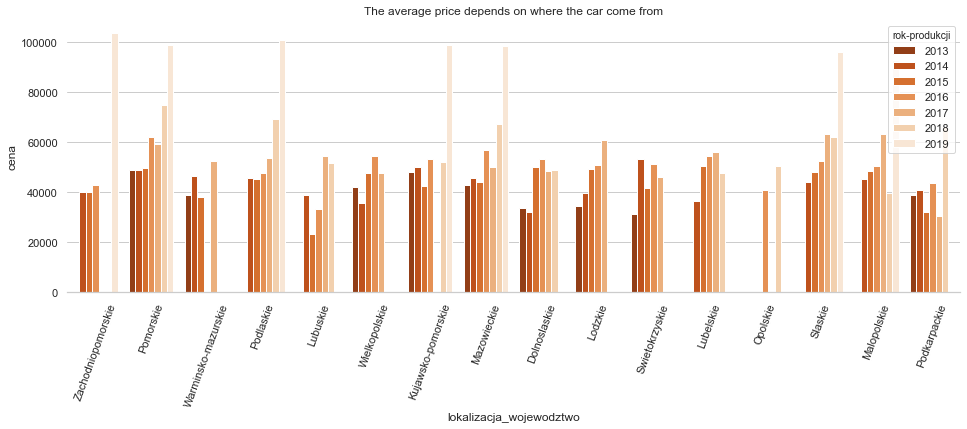

In [38]:
# plot parameters
f, ax = plt.subplots(figsize=(16, 5))
sns.set(style='whitegrid')
sns.despine(left=True)
plt.xticks(rotation=70)

# plot
sns.barplot(data=mazda_3_IIIgen,
            x='lokalizacja_wojewodztwo', y='cena', hue = 'rok-produkcji',
            estimator=np.mean, ci=None, palette='Oranges_r', order=regions) 

ax.set_title('The average price depends on where the car come from')

In [39]:
print('The average price depends on where the car come from')

#table
mazda_3_IIIgen.pivot_table(values='cena', index=['lokalizacja_wojewodztwo'],
                           columns='rok-produkcji',aggfunc='mean').round(2)

The average price depends on where the car come from


rok-produkcji,2013,2014,2015,2016,2017,2018,2019
lokalizacja_wojewodztwo,,,,,,,
Dolnoslaskie,33900.00,32037.33,50185.29,53465.00,48500.00,48900.00,NaN
Kujawsko-pomorskie,47900.00,49933.33,42440.00,53400.00,NaN,52200.00,98900.0
Lodzkie,34600.00,39766.67,49325.00,50900.00,60950.00,NaN,NaN
Lubelskie,NaN,36433.33,50595.00,54400.00,56040.00,47600.00,NaN
Lubuskie,NaN,38700.00,23500.00,33400.00,54500.00,51500.00,NaN
Malopolskie,NaN,45266.67,48357.00,50533.33,63100.00,39566.67,93000.0
Mazowieckie,42700.00,45719.35,43973.75,56716.88,50224.12,67389.47,98300.0
Opolskie,NaN,NaN,NaN,40800.00,NaN,50300.00,NaN
Podkarpackie,38900.00,40900.00,32100.00,43733.33,30500.00,65900.00,NaN


##### How the car equipment affect the price?

The average price depends on the car equipment


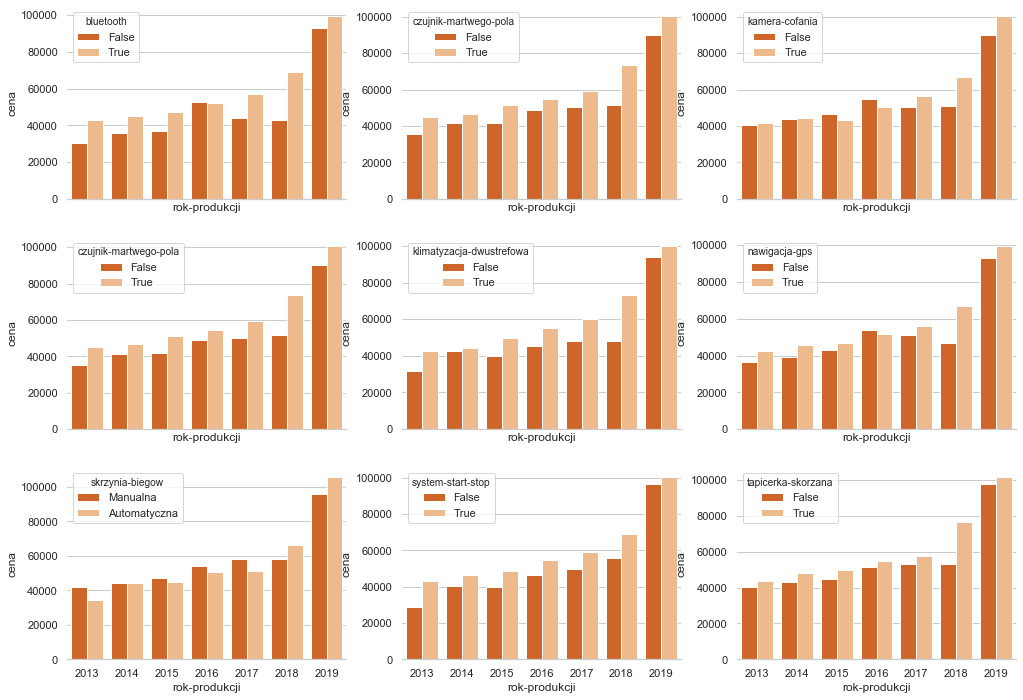

In [40]:
# style and size of the plot
f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(17, 12), sharex=True)
#plt.xticks(rotation=70)
sns.set(style='whitegrid')
sns.despine(left=True)

print('The average price depends on the car equipment')
# plot 1
sns.barplot(x='rok-produkcji', y='cena', hue = 'bluetooth', data=mazda_3_IIIgen, ax = ax1,
            ci=None, estimator=np.mean,  palette='Oranges_r')
# plot 2
sns.barplot(x='rok-produkcji', y='cena', hue = 'czujnik-martwego-pola', data=mazda_3_IIIgen, ax = ax2,
            ci=None, estimator=np.mean,  palette='Oranges_r')
# plot 3
sns.barplot(x='rok-produkcji', y='cena', hue = 'kamera-cofania', data=mazda_3_IIIgen, ax = ax3,
            ci=None, estimator=np.mean,  palette='Oranges_r')
# plot 4
sns.barplot(x='rok-produkcji', y='cena', hue = 'czujnik-martwego-pola', data=mazda_3_IIIgen, ax = ax4,
            ci=None, estimator=np.mean,  palette='Oranges_r')
# plot 5
sns.barplot(x='rok-produkcji', y='cena', hue = 'klimatyzacja-dwustrefowa', data=mazda_3_IIIgen, ax = ax5,
            ci=None, estimator=np.mean,  palette='Oranges_r')
# plot 6
sns.barplot(x='rok-produkcji', y='cena', hue = 'nawigacja-gps', data=mazda_3_IIIgen, ax = ax6,
            ci=None, estimator=np.mean,  palette='Oranges_r')
# plot 7
sns.barplot(x='rok-produkcji', y='cena', hue = 'skrzynia-biegow', data=mazda_3_IIIgen, ax = ax7,
            ci=None, estimator=np.mean,  palette='Oranges_r')
# plot 8
sns.barplot(x='rok-produkcji', y='cena', hue = 'system-start-stop', data=mazda_3_IIIgen, ax = ax8,
            ci=None, estimator=np.mean,  palette='Oranges_r')
# plot 9
sns.barplot(x='rok-produkcji', y='cena', hue = 'tapicerka-skorzana', data=mazda_3_IIIgen, ax = ax9,
            ci=None, estimator=np.mean,  palette='Oranges_r')


##### What is the price of a car with selected parameters?

In [43]:
# table
mazda_3_IIIgen[(mazda_3_IIIgen['rok-produkcji'].isin(['2013','2014']))
               &(mazda_3_IIIgen['rodzaj-paliwa'] == 'Benzyna')
               #&(mazda_3_IIIgen['bezwypadkowy'] == True)
               &(mazda_3_IIIgen['lokalizacja_wojewodztwo'].isin(['Zachodniopomorskie','Pomorskie', 
                                                                'Warminsko-mazurskie', 'Podlaskie',
                                                                'Wielkopolskie', 'Kujawsko-pomorskie', 
                                                                'Mazowieckie']))
               &(mazda_3_IIIgen['bluetooth'] == True)
               &(mazda_3_IIIgen['skrzynia-biegow'] == 'Manualna')
               &(mazda_3_IIIgen['klimatyzacja-dwustrefowa'] == True)
              ].groupby(['bezwypadkowy','lokalizacja_wojewodztwo'])['cena'].agg(
    [np.min, np.max, np.mean, np.median, np.size])

#'przebieg', , 'moc', 'oferta-od', 'pierwszy-wlasciciel' ,'pochodzenie'

amin     amax          mean   median  \
bezwypadkowy lokalizacja_wojewodztwo                                            
False        Kujawsko-pomorskie       47900.0  47900.0  47900.000000  47900.0   
             Mazowieckie              37700.0  50900.0  45057.142857  45500.0   
             Pomorskie                43000.0  54500.0  48133.333333  46900.0   
             Wielkopolskie            30000.0  41200.0  35600.000000  35600.0   
True         Kujawsko-pomorskie       49900.0  55000.0  52450.000000  52450.0   
             Mazowieckie              39900.0  44900.0  42650.000000  42900.0   
             Podlaskie                49900.0  49900.0  49900.000000  49900.0   
             Pomorskie                45900.0  56000.0  51675.000000  52400.0   
             Warminsko-mazurskie      38900.0  53900.0  46400.000000  46400.0   
             Wielkopolskie            46900.0  47900.0  47400.000000  47400.0   

                                      size  
bezwypadkowy lokalizacja_wojewodztwo        
False        Kujawsko-pomorskie        1.0  
             Mazowieckie               7.0  
             Pomorskie                 3.0  
             Wielkopolskie             2.0  
True         Kujawsko-pomorskie        2.0  
             Mazowieckie               4.0  
             Podlaskie                 2.0  
             Pomorskie                 4.0  
             Warminsko-mazurskie       4.0  
             Wielkopolskie             2.0